<a href="https://colab.research.google.com/github/AlexBB999/junk/blob/master/33_3_DL_Keras_%2BTF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
pip install tensorflow==2.0.0-rc1

     |████████████████████████████████| 86.3MB 57kB/s 
     |████████████████████████████████| 501kB 49.7MB/s 
     |████████████████████████████████| 4.3MB 45.1MB/s 
  Found existing installation: tensorflow 2.2.0rc3
    Uninstalling tensorflow-2.2.0rc3:
      Successfully uninstalled tensorflow-2.2.0rc3


In [0]:
from tensorflow.keras.models import Sequential

In [0]:
import warnings
warnings.filterwarnings("ignore")

from tensorflow.keras.datasets import mnist

**Load the data and do our preprocessing:**

---



In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

input_dim = 784  # 28*28
output_dim = nb_classes = 10
batch_size = 128
nb_epoch = 20

X_train = X_train.reshape(60000, input_dim)
X_test = X_test.reshape(10000, input_dim)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

11493376/11490434 [==============================] - 0s 0us/step


**Next we one hot code our target variable using to_categorical function of Keras' utils module**

In [0]:
from tensorflow.keras.utils import to_categorical

Y_train = to_categorical(y_train, nb_classes)
Y_test = to_categorical(y_test, nb_classes)

**Now, let's check the size of the data**:

In [0]:
X_train[0].shape

(784,)

In [0]:
X_train.shape

(60000, 784)

As you see, the size of each image is 784. In fact, all images in MNIST are 28 by 28 pixels and 784 is just the result of the multiplication of 28 by 28.

**So, the data we have is a flattened version of the images where each row in the 28x28 matrix is concatenated side by side**.

Let's plot some images and see what they look like:

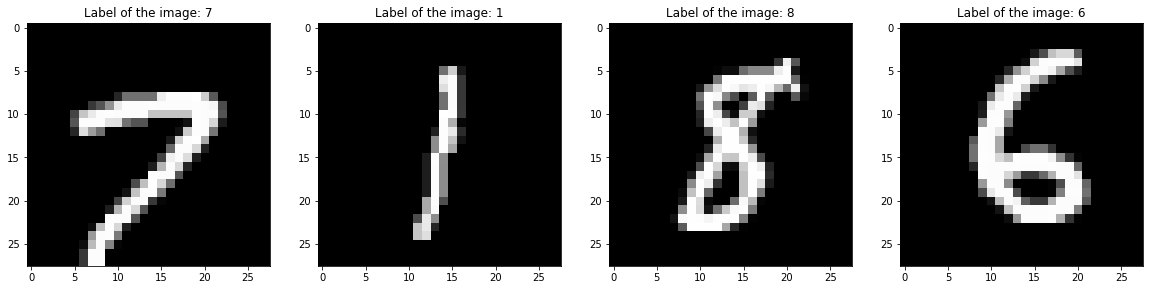

In [0]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,5))

plt.subplot(141)
plt.imshow(X_train[123].reshape(28,28), cmap="gray")
plt.title("Label of the image: {}".format(y_train[123]))

plt.subplot(142)
plt.imshow(X_train[124].reshape(28,28), cmap="gray")
plt.title("Label of the image: {}".format(y_train[124]))

plt.subplot(143)
plt.imshow(X_train[125].reshape(28,28), cmap="gray")
plt.title("Label of the image: {}".format(y_train[125]))

plt.subplot(144)
plt.imshow(X_train[126].reshape(28,28), cmap="gray")
plt.title("Label of the image: {}".format(y_train[126]))

plt.show()

We're now ready to jump into building our ANN model.

##**Defining the model**

As we said before, we'll build our model using Sequential class of Keras' models module. Once we create our model as:

**model = Sequential()**

We'll start to add layers to our model object one by one (**that is, sequentially**). 

**The layer type we'll use is called the dense layer** which we'll import from the layers module of the Keras.

In [0]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense

model = Sequential()
# our first dense layer
model.add(Dense(1028, input_shape=(784,), activation="relu"))
# our second dense layer
model.add(Dense(1028, activation="relu"))
# last layer is the output layer.
model.add(Dense(10, activation="softmax"))

**Note that, we set the neuron size of the output layer to 10**. 

**This is because in MNIST there are 10 classes**. 

**We also set the activation function of the output layer to softmax**

 We'll discuss why we use softmax as the activation function in the output layer.
 
For now, we say that when we give an image as input to the model, our model will produce 10 probabilities for each of the 10 classes in the MNIST data.
 
**The largest probability class will be the prediction of the model**.

We can have a look at the structure of our ANN model using the summary() method of our model object:

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1028)              806980    
_________________________________________________________________
dense_1 (Dense)              (None, 1028)              1057812   
_________________________________________________________________
dense_2 (Dense)              (None, 10)                10290     
Total params: 1,875,082
Trainable params: 1,875,082
Non-trainable params: 0
_________________________________________________________________


**As you see, we have three dense layers of which the last one is the output layer**.

 In total, we have 1,875,082 parameters to be estimated in our mode

**Compiling the model**

Now we can compile our model.

**When compiling the model, we define three things**:

**The optimizer** that will be used in the training. If you don't know about the optimizers in deep learning, do not worry. We just use it in this checkpoint. But, we'll talk about them in the following checkpoints.

**The loss function**. It's necessary to specify a loss function for a model. Training algorithms use this loss function and try to minimize it during the training. This is also something we'll cover in the next checkpoint.

**The metri**c to measure the training performance of our model. In this example, we use the accuracy metric, since our task is a classification task and our dataset is a balanced one

In [0]:
model.compile(optimizer='sgd', loss='categorical_crossentropy',
              metrics=['accuracy'])

##**Training the model**

We're now ready to train our model.

 Training a model in Keras is done by calling the **fit() method** of the model object.
 
  In the following, we train our model:

**Using 128 as the batch size**. This is something we'll discuss in a later checkpoint.


**Using 20 as the number of epochs**.

 In deep learning jargon, epoch means full use of all of the examples in the training data during the training the model. So, we'll train our model during 20 epochs, that's we'll use all of the observations in our training data 20 times when training our model.

In [0]:
# setting verbose=1 prints out some results after each epoch
model.fit(X_train, Y_train, batch_size=batch_size, epochs=20, verbose=1)

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 17s 287us/sample - loss: 1.0399 - accuracy: 0.7833
Epoch 2/20
60000/60000 [==============================] - 16s 275us/sample - loss: 0.4300 - accuracy: 0.8888
Epoch 3/20
60000/60000 [==============================] - 17s 279us/sample - loss: 0.3457 - accuracy: 0.9055
Epoch 4/20
60000/60000 [==============================] - 16s 275us/sample - loss: 0.3073 - accuracy: 0.9145
Epoch 5/20
60000/60000 [==============================] - 16s 272us/sample - loss: 0.2822 - accuracy: 0.9206
Epoch 6/20
60000/60000 [==============================] - 16s 273us/sample - loss: 0.2630 - accuracy: 0.9263
Epoch 7/20
60000/60000 [==============================] - 16s 274us/sample - loss: 0.2473 - accuracy: 0.9305
Epoch 8/20
60000/60000 [==============================] - 17s 277us/sample - loss: 0.2339 - accuracy: 0.9348
Epoch 9/20
60000/60000 [==============================] - 16s 274us/sample - loss: 0.2220 - accuracy: 0.9

##**Evaluating the model**

The last step is to evaluate our model using the test set we set apart before.
 For this purpose, we use the **evaluate() method** of the model object.

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.1453822269245982
Test accuracy: 0.9566



The test set accuracy of our model is almost 97%.  --**NO**

Good job. Now it's your turn!

##**Assignments**

To complete this assignment, create a Jupyter notebook containing your solutions to the following tasks:

1 - In this task, you'll build an ANN and train and test it using the MNIST data.

 **This ANN should consist of two hidden and one output layer**.
 
  **All hidden layers should be dense**.
 
**The neuron sizes of the first layer and the second layer should be 32 and 16 respectivel**y.
  
   Train this model 20 epochs and compare your train and test set performance with the example in the checkpoint. 
   
   Is there any difference? If so, why?

2 - **You'll also build an ANN in this task**.

**This time, this ANN should have 5 hidden layers and 1 output layer**.

All the layers should be dense. 

**The neuron numbers for the hidden layers should be 1024, 512, 256, 128 and 64.**

Train this model 20 epochs and test it using the same data from the previous task and compare your results. 

Is there any difference? If so, why?

In [0]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense

model = Sequential()
# our first dense layer,
model.add(Dense(1028, input_shape=(784,), activation="relu"))
# our second dense layer
model.add(Dense(1028,input_shape=(32,), activation="relu"))
#another layer
model.add(Dense(1028,input_shape=(16,), activation="relu"))
# last layer is the output layer.
model.add(Dense(10, activation="softmax"))

In [0]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 1028)              806980    
_________________________________________________________________
dense_7 (Dense)              (None, 1028)              1057812   
_________________________________________________________________
dense_8 (Dense)              (None, 1028)              1057812   
_________________________________________________________________
dense_9 (Dense)              (None, 10)                10290     
Total params: 2,932,894
Trainable params: 2,932,894
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer='sgd', loss='categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
# setting verbose=1 prints out some results after each epoch
model.fit(X_train, Y_train, batch_size=batch_size, epochs=20, verbose=1)

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 28s 472us/sample - loss: 1.0855 - accuracy: 0.7811
Epoch 2/20
60000/60000 [==============================] - 28s 460us/sample - loss: 0.3914 - accuracy: 0.8937
Epoch 3/20
60000/60000 [==============================] - 28s 460us/sample - loss: 0.3153 - accuracy: 0.9107
Epoch 4/20
60000/60000 [==============================] - 28s 459us/sample - loss: 0.2784 - accuracy: 0.9203
Epoch 5/20
60000/60000 [==============================] - 27s 454us/sample - loss: 0.2526 - accuracy: 0.9277
Epoch 6/20
60000/60000 [==============================] - 27s 449us/sample - loss: 0.2320 - accuracy: 0.9330
Epoch 7/20
60000/60000 [==============================] - 27s 451us/sample - loss: 0.2151 - accuracy: 0.9381
Epoch 8/20
60000/60000 [==============================] - 30s 502us/sample - loss: 0.2002 - accuracy: 0.9428
Epoch 9/20
60000/60000 [==============================] - 26s 436us/sample - loss: 0.1876 - accuracy: 0.9

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.11610818285010754
Test accuracy: 0.9659


**PART 2**

In [0]:

model = Sequential()
# our first dense layer,
model.add(Dense(1028, input_shape=(784,), activation="relu"))
#HIDDEN LAYER
model.add(Dense(1028,input_shape=(512,), activation="relu"))
#HIDDEN LAYER
model.add(Dense(1028,input_shape=(256,), activation="relu"))
#HIDDEN LAYER
model.add(Dense(1028,input_shape=(128,), activation="relu"))
#HIDDEN LAYER
model.add(Dense(1028,input_shape=(64,), activation="relu"))
# last layer is the output layer.
model.add(Dense(10, activation="softmax"))

In [0]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 1028)              806980    
_________________________________________________________________
dense_11 (Dense)             (None, 1028)              1057812   
_________________________________________________________________
dense_12 (Dense)             (None, 1028)              1057812   
_________________________________________________________________
dense_13 (Dense)             (None, 1028)              1057812   
_________________________________________________________________
dense_14 (Dense)             (None, 1028)              1057812   
_________________________________________________________________
dense_15 (Dense)             (None, 10)                10290     
Total params: 5,048,518
Trainable params: 5,048,518
Non-trainable params: 0
____________________________________________

In [0]:
model.compile(optimizer='sgd', loss='categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
# setting verbose=1 prints out some results after each epoch
model.fit(X_train, Y_train, batch_size=batch_size, epochs=20, verbose=1)

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 45s 755us/sample - loss: 1.3328 - accuracy: 0.7025
Epoch 2/20
60000/60000 [==============================] - 45s 758us/sample - loss: 0.3815 - accuracy: 0.8925
Epoch 3/20
60000/60000 [==============================] - 46s 759us/sample - loss: 0.2902 - accuracy: 0.9166
Epoch 4/20
60000/60000 [==============================] - 46s 762us/sample - loss: 0.2456 - accuracy: 0.9288
Epoch 5/20
60000/60000 [==============================] - 46s 759us/sample - loss: 0.2152 - accuracy: 0.9382
Epoch 6/20
60000/60000 [==============================] - 45s 758us/sample - loss: 0.1911 - accuracy: 0.9448
Epoch 7/20
60000/60000 [==============================] - 45s 758us/sample - loss: 0.1722 - accuracy: 0.9506
Epoch 8/20
60000/60000 [==============================] - 45s 758us/sample - loss: 0.1551 - accuracy: 0.9561
Epoch 9/20
60000/60000 [==============================] - 48s 796us/sample - loss: 0.1415 - accuracy: 0.9

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.08714763048002497
Test accuracy: 0.9722
